In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
from tqdm import tqdm

# file containing functions:
import loadquakes
importlib.reload(loadquakes)
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")

ERROR 1: PROJ: proj_create_from_database: Open of /home/amand4/anaconda3/envs/syamsul_2023/share/proj failed


In [2]:
def grace_snapshot(lat,lon,title,snapshot,ax):
    ax.plot(lon,lat,'o', c='gold', alpha=0.5, markersize=12)
    ax.plot(lon,lat,'o', markeredgecolor='k',markerfacecolor='None',markersize=12)
    c=ax.pcolormesh(ds.lon,ds.lat,snapshot,vmin=-100,vmax=100,cmap='seismic')
    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.colorbar(c, ax=ax, label='Surface mass load (cm-we)')

## GRACE PCA snapshots of significant events

#### Gorkha M7.8, 2015

In [3]:
dataset=ds.time.to_numpy()
index = np.where(dataset == np.datetime64('2015-04-27T00:00:00.000000000'))
print(index)

(array([144]),)


In [4]:
# Timestamp with Gorkha
ds.time.to_numpy()[index]

array(['2015-04-27T00:00:00.000000000'], dtype='datetime64[ns]')

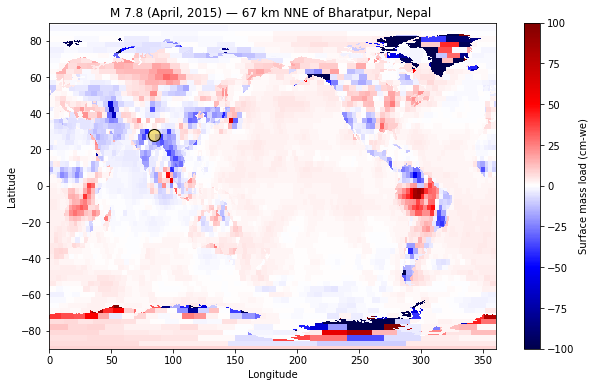

In [5]:
snapshot = ds.lwe_thickness.to_numpy()[index,:,:].squeeze()
fig,ax = plt.subplots(figsize=(10,6))

grace_snapshot(28.23,84.731,'M 7.8 (April, 2015) — 67 km NNE of Bharatpur, Nepal ',snapshot,ax)

#### Earthquakes with largest cp:

In [6]:
'''
Event 1 with cp = 11.91
'''

ds.sel(time='2005-06-01T12:00:00.000000000', method="nearest")

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    time           datetime64[ns] 2005-06-16
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (lat, lon) float64 -2.731 -2.731 -2.731 ... 3.401 3.401 3.401
    uncertainty    (lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 ...
    lon_bounds     (lon, bounds) float64 ...
    time_bounds    (bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2022-03-08T07:03:58Z

In [7]:
index = np.where(dataset == np.datetime64('2005-06-16T00:00:00.000000000'))
print(index)

(array([35]),)


In [8]:
ds.time.to_numpy()[34]

numpy.datetime64('2005-05-16T12:00:00.000000000')

In [9]:
snapshot1 = ds.lwe_thickness.to_numpy()[34,:,:].squeeze()

In [10]:
'''
Event 2 with cp = 11.91
'''

ds.sel(time='2003-08-18T12:00:00.000000000', method="nearest")

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    time           datetime64[ns] 2003-08-16T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (lat, lon) float64 -0.603 -0.603 -0.603 ... 1.551 1.551 1.551
    uncertainty    (lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 -90.0 -89.5 -89.5 ... 89.5 89.5 90.0
    lon_bounds     (lon, bounds) float64 0.0 0.5 0.5 1.0 ... 359.5 359.5 360.0
    time_bounds    (bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2022-03-08T07:03:58Z

In [11]:
index = np.where(dataset == np.datetime64('2003-08-16T12:00:00'))
print(index)

(array([13]),)


In [12]:
snapshot2 = ds.lwe_thickness.to_numpy()[index,:,:].squeeze()

In [13]:
'''
Event 3 with cp = 11.91
'''

ds.sel(time='2003-07-26T12:00:00.000000000', method="nearest")

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    time           datetime64[ns] 2003-07-16T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (lat, lon) float64 -0.8361 -0.8361 -0.8361 ... 1.757 1.757
    uncertainty    (lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 -90.0 -89.5 -89.5 ... 89.5 89.5 90.0
    lon_bounds     (lon, bounds) float64 0.0 0.5 0.5 1.0 ... 359.5 359.5 360.0
    time_bounds    (bounds) datetime64[ns] ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2022-03-08T07:03:58Z

In [14]:
index = np.where(dataset == np.datetime64('2003-07-16T12:00:00'))
print(index)

(array([12]),)


In [15]:
snapshot3 = ds.lwe_thickness.to_numpy()[index,:,:].squeeze()

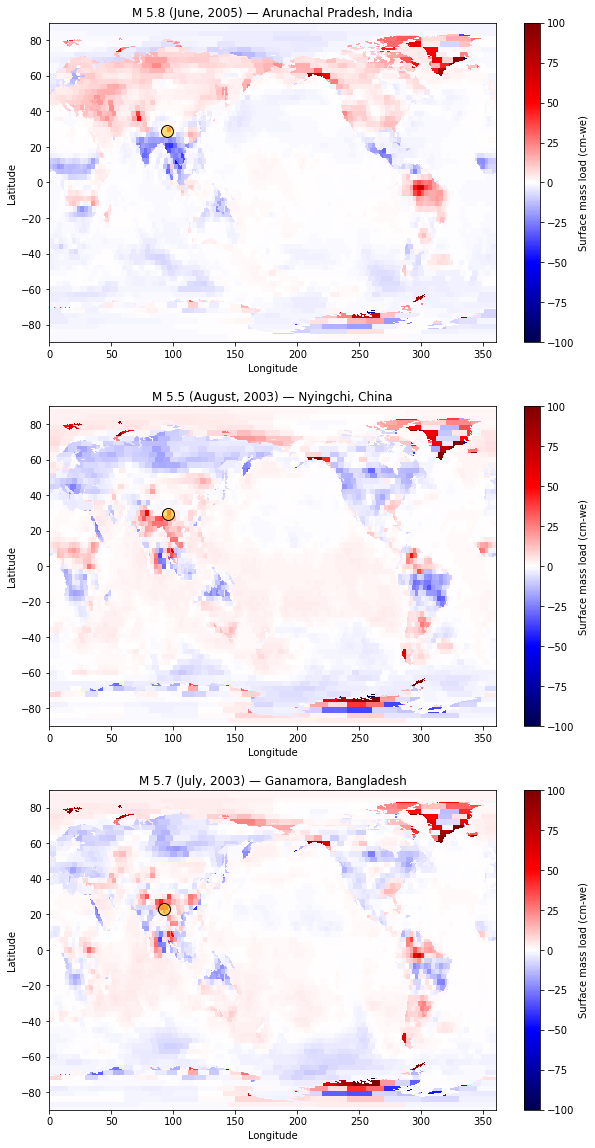

In [17]:
fig,((ax1),(ax2),(ax3)) = plt.subplots(3,1, figsize=(10,20))

grace_snapshot(28.8810,94.6260,'M 5.8 (June, 2005) — Arunachal Pradesh, India',snapshot1,ax1)
grace_snapshot(22.8540,92.3060,'M 5.7 (July, 2003) — Ganamora, Bangladesh',snapshot3,ax3)
grace_snapshot(29.5730,95.6050,'M 5.5 (August, 2003) — Nyingchi, China',snapshot2, ax2)